In [ ]:
#libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#
import src.functions as f

In [2]:
data = pd.read_csv("Data/ParisHousing.csv")
data.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
cat_columns, num_columns = f.identify_column_types(data)
print("Categorical columns: ", cat_columns)
print("Numerical columns: ", num_columns)

Categorical columns:  []
Numerical columns:  ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


In [4]:
data.dtypes 

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

We have to change, because same of the categorical featuresa appear as numerical

In [5]:
data = df = f.convert_category(data, ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 'hasGuestRoom'])

In [6]:
data.dtypes 

squareMeters            int64
numberOfRooms           int64
hasYard              category
hasPool              category
floors                  int64
cityCode                int64
cityPartRange           int64
numPrevOwners           int64
made                    int64
isNewBuilt           category
hasStormProtector    category
basement                int64
attic                   int64
garage                  int64
hasStorageRoom       category
hasGuestRoom         category
price                 float64
dtype: object

To accurately predict values, it is crucial to preprocess the data to ensure its quality.

The first step in this process is to analyze **missing values**.

In [7]:
print(data.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


We can see that there are no missing values in any of the columns

The next step is to verify if we have any **outlier** in our data

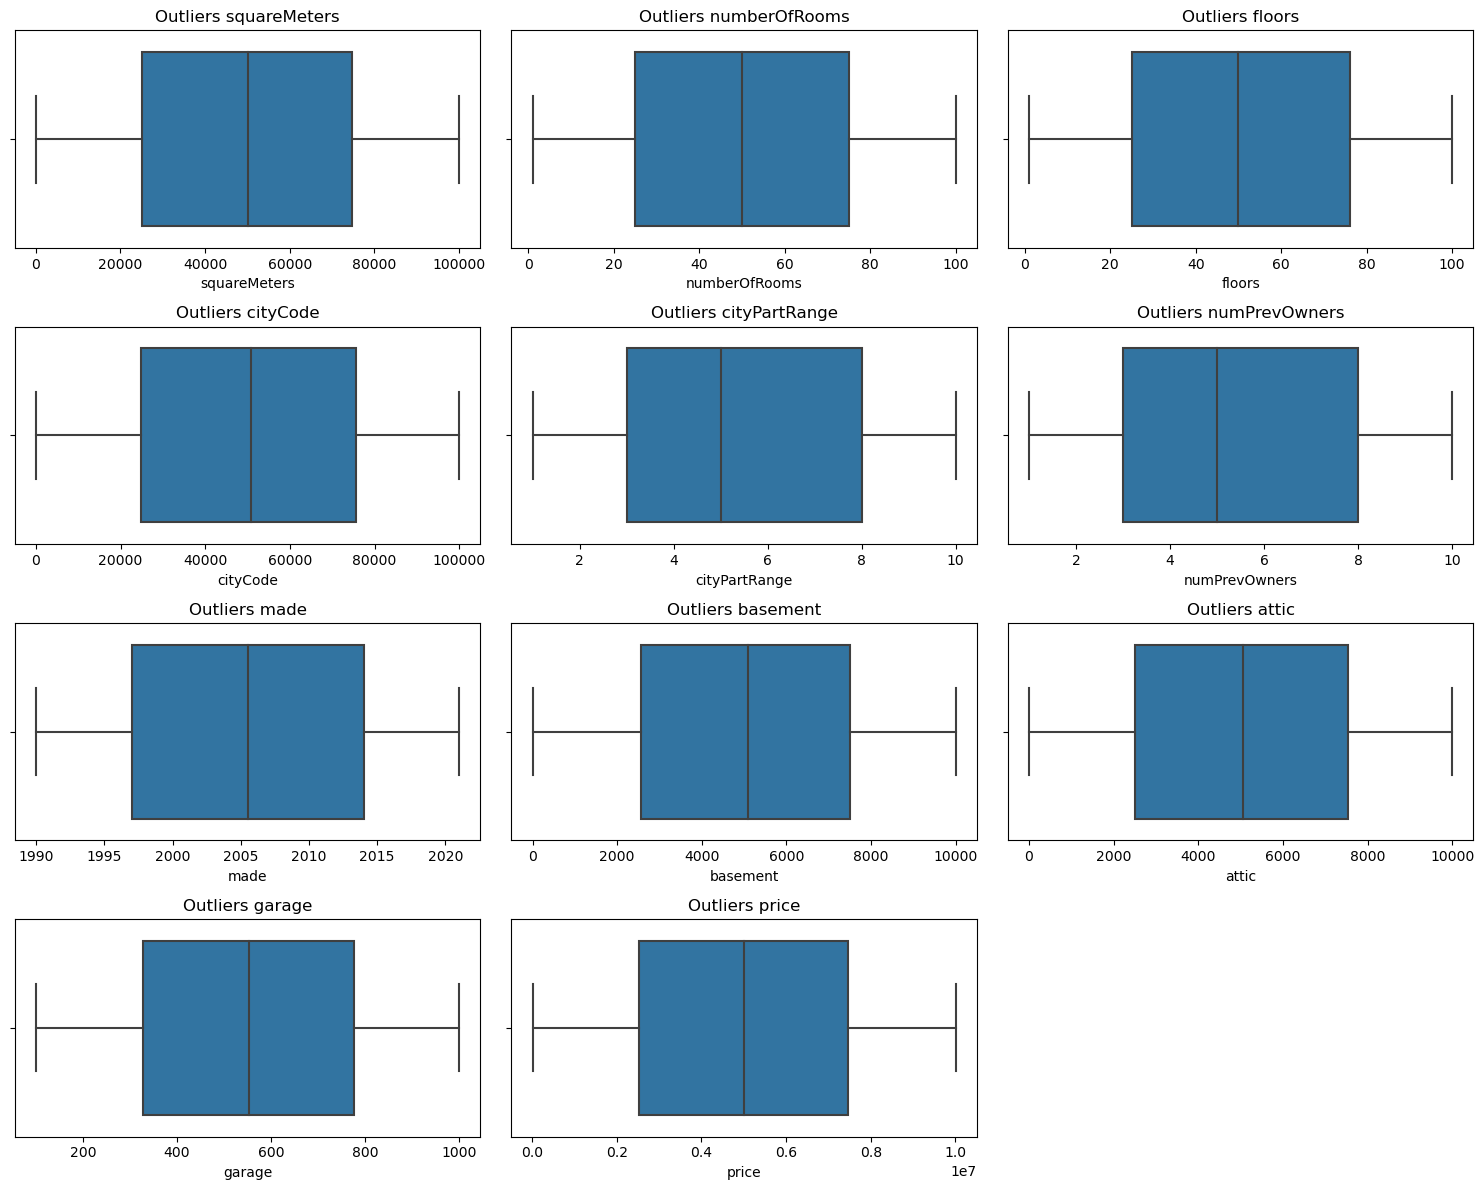

In [8]:
numeric_columns = data.select_dtypes(include=np.number).columns

f.boxplot_outliers(data, numeric_columns)

After confirming the absence of missing values and outliers, we proceeded to **normalize** the data to enhance the model's performance. 

To facilitate this process, we partitioned the dataset into two distinct subsets: one for training and one for evaluation.

In [9]:
X = data.drop(columns=['price'])  
y = data['price'] 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_data = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_data = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
train_combined = pd.concat([X_train_data, y_train.reset_index(drop=True)], axis=1)
test_combined = pd.concat([X_test_data, y_test.reset_index(drop=True)], axis=1)

In [ ]:
#save the data
train_combined.to_csv('Data/ParisHousing_train_data.csv', index=False)
test_combined.to_csv('Data/ParisHousing_test_data.csv', index=False)